<a href="https://colab.research.google.com/github/rondinell/Intelig-ncia-Artificial/blob/main/Artigo_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ranking dos FIIs:
      Ticker     DY      P/VP      Liquidez  rank_dy  rank_pvp  rank_liquidez  \
3  MXRF11.SA  12.92  0.930889  1.491936e+06      2.0       2.0            1.0   
1  KNRI11.SA   7.57  0.895839  4.872351e+04      6.0       1.0            5.0   
0  HGLG11.SA   8.52  0.985155  4.711979e+04      5.0       3.0            6.0   
2  VISC11.SA   8.90       NaN  5.000239e+04      4.0       NaN            4.0   
4  SNEL11.SA  14.04       NaN  7.613756e+04      1.0       NaN            3.0   
5  RBRF11.SA  10.20       NaN  3.782328e+05      3.0       NaN            2.0   

   pontuacao  
3        5.0  
1       12.0  
0       14.0  
2        NaN  
4        NaN  
5        NaN  

Proposta de alocação na carteira:
      Ticker  Investimento     DY      P/VP      Liquidez
3  MXRF11.SA   1666.666667  12.92  0.930889  1.491936e+06
1  KNRI11.SA   1666.666667   7.57  0.895839  4.872351e+04
0  HGLG11.SA   1666.666667   8.52  0.985155  4.711979e+04
2  VISC11.SA   1666.666667   8.90       Na

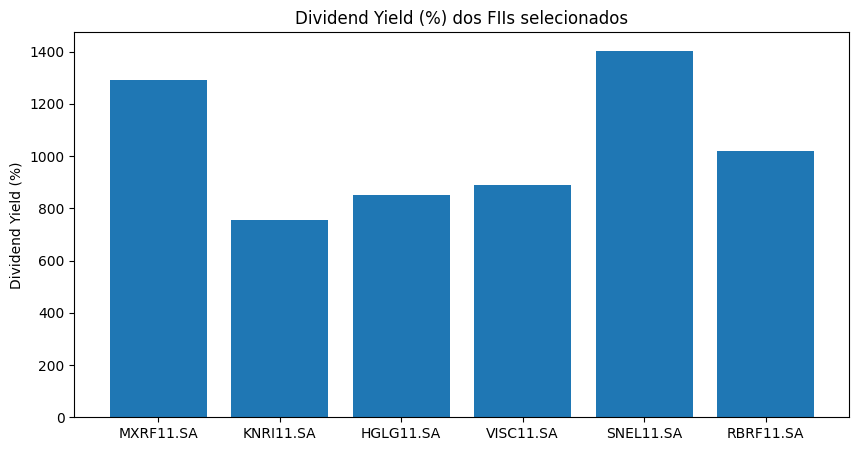

In [3]:
# Montando uma carteira automática de FIIs - passo a passo

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lista de alguns FIIs populares na B3
fiis = ['HGLG11.SA', 'KNRI11.SA', 'VISC11.SA', 'MXRF11.SA', 'SNEL11.SA', 'RBRF11.SA']

# Função para pegar dados históricos e dividendos (proxy DY)
def pega_dados_fii(ticker):
    fii = yf.Ticker(ticker)
    hist = fii.history(period="1y")
    info = fii.info

    # Dividendo anual estimado (dividendYield * price)
    try:
        dy = info.get('dividendYield', 0) or 0
    except:
        dy = 0

    # P/VP se disponível
    p_vp = info.get('priceToBook', np.nan)

    # Volume médio diário como proxy de liquidez
    volume = hist['Volume'].mean()

    return {
        'Ticker': ticker,
        'DY': dy,
        'P/VP': p_vp,
        'Liquidez': volume
    }

# Monta dataframe com dados dos FIIs
dados_fiis = []
for fii in fiis:
    dados = pega_dados_fii(fii)
    dados_fiis.append(dados)

df = pd.DataFrame(dados_fiis)

# Para vacância, geralmente não está disponível via yfinance, precisa de consulta manual ou via base CVM

# Criar ranking simples (pontuações)
df['rank_dy'] = df['DY'].rank(ascending=False)
df['rank_pvp'] = df['P/VP'].rank(ascending=True)
df['rank_liquidez'] = df['Liquidez'].rank(ascending=False)

df['pontuacao'] = df['rank_dy'] + df['rank_pvp'] + df['rank_liquidez']

df = df.sort_values('pontuacao')

print("Ranking dos FIIs:")
print(df)

# Simulação de alocação igualitária
total_investimento = 10000  # R$ 10.000
qtd_fiis = len(df)
invest_por_fii = total_investimento / qtd_fiis

df['Investimento'] = invest_por_fii

print("\nProposta de alocação na carteira:")
print(df[['Ticker', 'Investimento', 'DY', 'P/VP', 'Liquidez']])

# Gráfico do Dividend Yield dos FIIs
plt.figure(figsize=(10,5))
plt.bar(df['Ticker'], df['DY']*100)
plt.title('Dividend Yield (%) dos FIIs selecionados')
plt.ylabel('Dividend Yield (%)')
plt.show()
